#**Importing libraries & Reading Data**


##Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

##Read the data

In [ ]:
df = pd.read_csv("Heart_Disease.csv")

#**Data Preprocessing**


In [ ]:
#look at the first 5 rows of the data
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No


In [ ]:
#check the shape of the data set
df.shape

(270, 17)

In [ ]:
#check the data type of each column
df.dtypes

id                           int64
Age                        float64
Gender                      object
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
work_type                   object
smoking_status              object
Heart Disease               object
dtype: object

In [ ]:
#check the number of nulls in each column and the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [ ]:
df.isnull().sum()

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64

<Axes: title={'center': 'Distribution of age'}, xlabel='Age', ylabel='Density'>

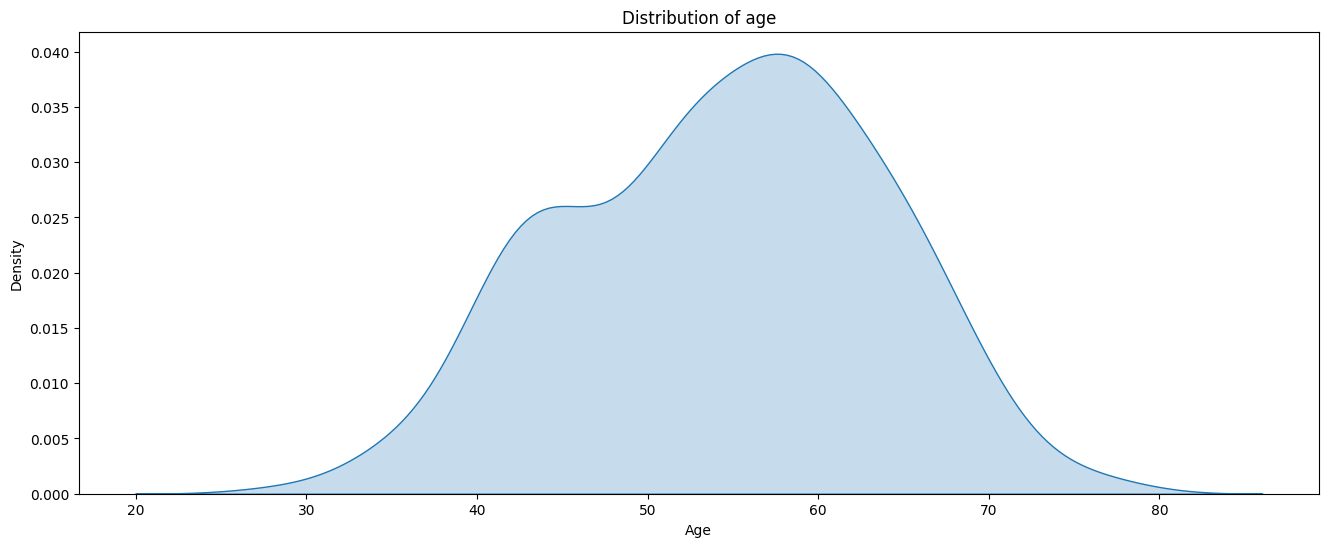

In [ ]:
plt.figure(figsize = (16, 6))
plt.title("Distribution of age")
sns.kdeplot(data = df['Age'], fill = True)

The plot showed that the age is normally distributed so we will use the mean to replace null values in age column

In [ ]:
#replacing nulls in age column by mean
mean_value=df['Age'].mean()
df['Age'].fillna(value=mean_value, inplace=True)

In [ ]:
#replacing nulls in Gender, work_type, smoking_status columns by their mode because they are categorical data
df['Gender'].fillna(value=df['Gender'].mode()[0], inplace=True)
df['work_type'].fillna(value=df['work_type'].mode()[0], inplace=True)
df['smoking_status'].fillna(value=df['smoking_status'].mode()[0], inplace=True)


In [ ]:
#changing data type of Gender, work_type, smoking_status and Heart Disease columns by encoding
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])
df['Heart Disease']= label_encoder.fit_transform(df['Heart Disease'])
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,0,4,130,322,0,2,109,0,2.4,2,3,3,2,1,1
1,2,67.0,1,3,115,564,0,2,160,0,1.6,2,0,7,3,2,0
2,3,57.0,0,2,124,261,0,0,141,0,0.3,1,0,7,2,2,1
3,4,64.0,0,4,128,263,0,0,105,1,0.2,2,1,7,2,3,0
4,5,74.0,1,2,120,269,0,2,121,1,0.2,1,1,3,3,2,0


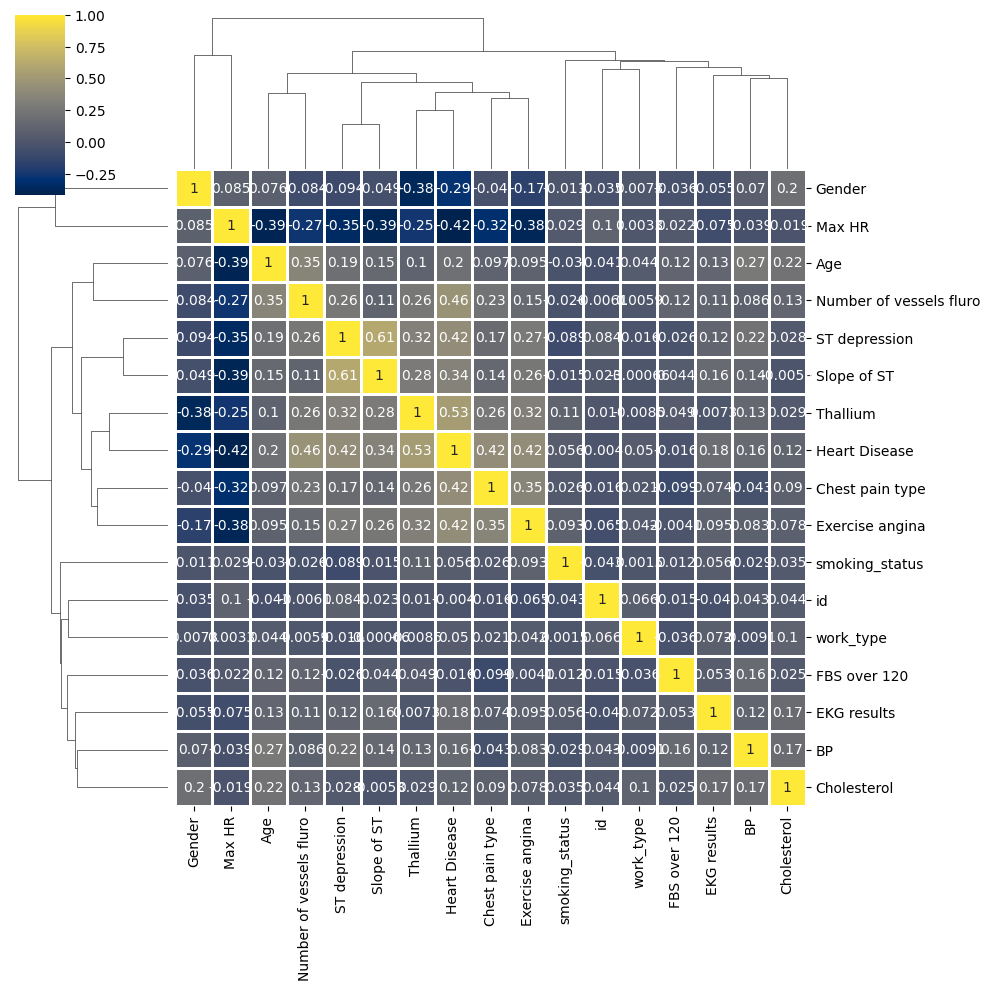

In [ ]:
sns.clustermap(df.corr(),lw = 1, annot = True, cmap = 'cividis')

In [ ]:
df.describe().T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      270 non-null    float64
 2   Gender                   270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [ ]:
for col in df.columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in id: 0
Number of outliers in Age: 0
Number of outliers in Gender: 0
Number of outliers in Chest pain type: 20
Number of outliers in BP: 8
Number of outliers in Cholesterol: 5
Number of outliers in FBS over 120: 30
Number of outliers in EKG results: 0
Number of outliers in Max HR: 1
Number of outliers in Exercise angina: 0
Number of outliers in ST depression: 3
Number of outliers in Slope of ST: 0
Number of outliers in Number of vessels fluro: 11
Number of outliers in Thallium: 0
Number of outliers in work_type: 74
Number of outliers in smoking_status: 0
Number of outliers in Heart Disease: 0


In [ ]:
#fig, ax = plt.subplots(figsize=(10, 5))
#columns = ['Chest pain type','BP','Cholesterol','FBS over 120','Max HR','ST depression','Number of vessels fluro', 'work_type']
#for col in columns:
  #sns.boxplot(df[col])

In [ ]:
# Checking outliers 
#fig, axs = plt.subplots(4,2, figsize = (25,30))
#plt = sns.boxplot(df['Age'], ax = axs[0, 0])

#plt.tight_layout()


In [ ]:
#function to replace outliers with the max value possible without missing the data :)
def outliers(dataset,col):
  Q1 = dataset[col].quantile(0.25)
  Q3 = dataset[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  for i in range(len(dataset)):
      if dataset[col].iloc[i] > upper_bound:
          dataset[col].iloc[i] = upper_bound
      if dataset[col].iloc[i] < lower_bound:
          dataset[col].iloc[i] = lower_bound
for col in df.columns:
    outliers(df, col)

for col in df.columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in id: 0
Number of outliers in Age: 0
Number of outliers in Gender: 0
Number of outliers in Chest pain type: 0
Number of outliers in BP: 0
Number of outliers in Cholesterol: 0
Number of outliers in FBS over 120: 0
Number of outliers in EKG results: 0
Number of outliers in Max HR: 0
Number of outliers in Exercise angina: 0
Number of outliers in ST depression: 0
Number of outliers in Slope of ST: 0
Number of outliers in Number of vessels fluro: 0
Number of outliers in Thallium: 0
Number of outliers in work_type: 0
Number of outliers in smoking_status: 0
Number of outliers in Heart Disease: 0


<ipython-input-197-05c4f46c119c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col].iloc[i] = upper_bound


In [ ]:
#Normlize the data
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(df)

# Create a new dataframe from the normalized data
df = pd.DataFrame(normalized_data, columns=df.columns)



In [ ]:
df.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,-1.699582,0.462523,-0.716115,-1.951379,-0.173000,0.304993,0.0,-0.899145,-0.419138,-0.689202,-0.568283,-0.878938,-0.729062,1.32551,0.0,0.468458,1.166190
1,-1.686979,1.248133,-0.716115,0.789844,0.086225,0.349369,0.0,-0.899145,-1.989242,1.450953,-0.672410,0.849640,0.729062,1.32551,0.0,1.438248,-0.857493
2,-1.661774,1.360363,-0.716115,0.789844,-0.432226,-1.558812,0.0,-0.899145,-0.462752,-0.689202,-0.464157,-0.878938,-0.729062,1.32551,0.0,-0.501332,-0.857493
3,-1.636568,0.686983,-0.716115,0.789844,-1.080290,-0.183146,0.0,1.121791,-0.375524,1.450953,0.368855,0.849640,0.729062,1.32551,0.0,0.468458,1.166190
4,-1.623965,0.799213,-0.716115,0.789844,0.863902,1.015014,0.0,1.121791,0.845668,-0.689202,0.368855,0.849640,2.187186,1.32551,0.0,-1.471122,1.166190
